In [1]:
# Do not delete or change this cell

# grading import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [ ]:
# your code here
import random

def get_outcome (num_plays): 
    earnings = 0
    legal_range_from = 1
    legal_range_to = 18
    for i in range(1, num_plays):
        point = random.randint(1, 38)
        if point >= legal_range_from and point <= legal_range_to:
            earnings = earnings + 1
        else:
            earnings = earnings - 1
    return (earnings)

In [ ]:
import random
import matplotlib.pyplot as plt
def get_outcome (num_plays): 
    earnings = 0
    legal_range_from = 1
    legal_range_to = 18
    for i in range(1, num_plays):
        point = random.randint(1, 38)
        if point >= legal_range_from and point <= legal_range_to:
            earnings = earnings + 1
        else:
            earnings = earnings - 1
    return (earnings)

def p_casino_loss (num_plays): 
    win = 0
    for j in range(1,500):
        for i in range(1, num_plays):
            if get_outcome(i) > 0:
                win += 1
    return (win/500)

result = []
for i in range(25,1000):
    result.append(p_casino_loss(i))
    
print(result)
plt.plot(result)
plt.show()

In [ ]:
# Grading cell - do not change or delete
num_plays = 10000
get_outcome(num_plays) / num_plays

##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  The data frame shall have 4 labeled columns where each column contains data from each of the 4 simulations. Create histograms that show the distributions of total earnings for the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

[[   1    7   -5 ...   -5    1   -3]
 [   2   -6   -2 ...   -4   -6   -8]
 [  -1   -9   -9 ...  -11   -3   -9]
 [-109  -43  -31 ...  -71  -75  -61]]
<class 'numpy.ndarray'>


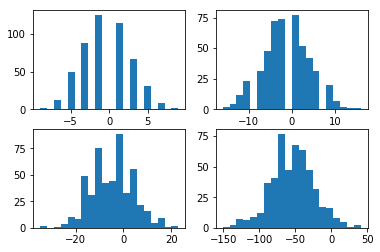

In [15]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
a = []
b = []
c = []
d = []

for i in range(1, 500):  
  a.append(get_outcome(10))
  b.append(get_outcome(25))
  c.append(get_outcome(100))
  d.append(get_outcome(1000))
  
 
roulette_sim_array = np.array([a,b,c,d])
print(roulette_sim_array)
print(type(roulette_sim_array))

plt.figure()
plt.subplot(2, 2, 1)
plt.hist(a,20)
plt.subplot(2, 2, 2)
plt.hist(b,20)
plt.subplot(2, 2, 3)
plt.hist(c,20)
plt.subplot(2, 2, 4)
plt.hist(d,20)
plt.show()

##### Grading Feedback Cell

Your explanation here:<br>  

##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe should have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

[-0.41082164328657317, -1.3867735470941884, -4.751503006012024, -54.342685370741485]
[3.101096051348924, 5.342076466390871, 8.849802865997923, 29.829723874955977]


(4, 499)

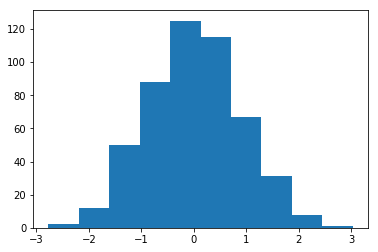

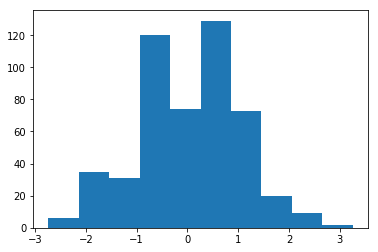

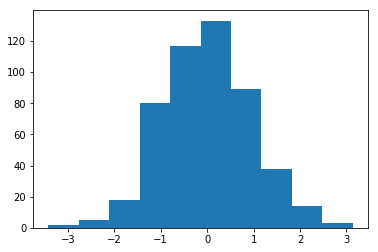

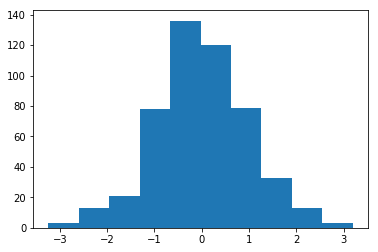

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_array = []
for i in roulette_sim_array:
    mean_i = np.mean(i)
    std_i = np.std(i)
    
    new_i = np.copy(i)
    new_i = (new_i - mean_i) / std_i
    new_array.append(new_i)
new_array = np.array(new_array)
roulette_df = pd.DataFrame(data=new_array,index=['Simlation10','Simlation25','Simlation100','Simlation1000'])
for i in new_array:
    plt.hist(i)
    plt.show()

In [93]:
# Grading cell - do not modify
roulette_df.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
Simlation10,0.454943,2.389743,-1.479857,-1.479857,-1.479857,-0.189990,0.454943,-1.479857,0.454943,0.454943,...,0.454943,-0.189990,-0.834924,0.454943,-0.834924,1.744809,-0.189990,-1.479857,0.454943,-0.834924
Simlation25,0.633981,-0.863564,-0.114792,-0.489178,-0.114792,0.633981,0.259594,1.757139,-0.863564,-1.612337,...,-0.489178,-0.489178,-0.114792,-0.489178,-1.986723,-2.361109,0.633981,-0.489178,-0.863564,-1.237951
Simlation100,0.423908,-0.480067,-0.480067,-1.384042,1.327883,-1.384042,0.649902,-0.028079,-0.480067,-1.384042,...,0.875896,2.005864,3.135833,-0.932054,-0.028079,-3.191992,1.327883,-0.706061,0.197914,-0.480067
Simlation1000,-1.832310,0.380248,0.782531,1.721192,-0.491366,0.514342,-0.022036,-2.167547,-1.027744,-0.022036,...,0.246153,-0.960697,-0.156130,1.251862,-1.161838,-1.228885,0.179106,-0.558413,-0.692508,-0.223177


# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette, and returns the probability that the casino loses money.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

In [126]:
# your code here
import random
import matplotlib.pyplot as plt

import random
import matplotlib.pyplot as plt

def p_casino_loss (num_plays): 
    win = 0
    for j in range(1,500):
      for i in range(1, num_plays):
        if get_outcome(i) > 0:
          win += 1
    return (win/500)

result = []
for i in range(25,1000):
    result.append(p_casino_loss (i))

plt.plot(result)
plt.show()

KeyboardInterrupt: 

In [ ]:
import random
import matplotlib.pyplot as plt

def p_casino_loss (num_plays): 
    earnings = 0
    legal_range_from = 1
    legal_range_to = 18
    for i in range(1, num_plays):
        point = random.randint(1, 38)
        if point >= legal_range_from and point <= legal_range_to:
            earnings = earnings + 1
    return ((1-earnings)/num_plays)

result = []
for i in range(25,1000,20):
    result.append(p_casino_loss (i))

plt.plot(result)



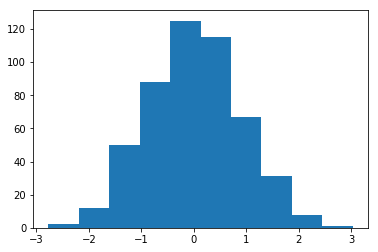

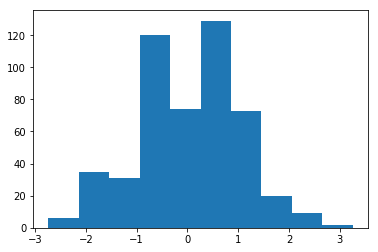

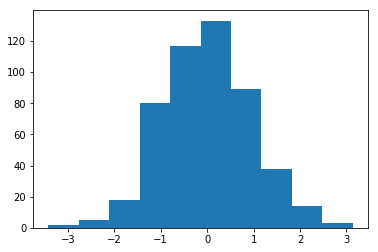

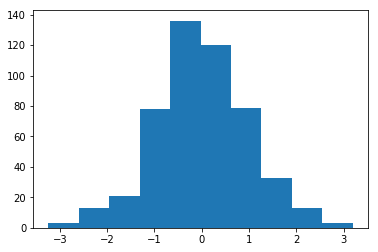

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_array = []
for i in roulette_sim_array:
    mean_i = np.mean(i)
    std_i = np.std(i)
    
    new_i = np.copy(i)
    new_i = (new_i - mean_i) / std_i
    new_array.append(new_i)
new_array = np.array(new_array)
roulette_df = pd.DataFrame(data=new_array,index=['Simlation10','Simlation25','Simlation100','Simlation1000'])

plt.figure()
for i in new_array:
    plt.hist(i)
    plt.show()

# Question 5 (10 pts)
Read each of the csv files in your assignment repo into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.

In [80]:
# your code here
import pandas as pd
population_df = pd.read_csv('indicator gapminder population - Data.csv')
morttality_df = pd.read_csv('indicator gapminder under5mortality - Data.csv')
life_exp_df = pd.read_csv('indicator life_expectancy_at_birth - Data.csv')
fertility_df = pd.read_csv('indicator undata total_fertility - Data.csv')

population_df.rename(columns={'Total population':'Country'}, inplace=True)
morttality_df.rename(columns={'Under five mortality':'Country'}, inplace=True)
fertility_df.rename(columns={'Total fertility rate':'Country'}, inplace=True)
life_exp_df.rename(columns={'Life expectancy with projections. Yellow is IHME':'Country'}, inplace=True)

population_df.head()
morttality_df.head()
life_exp_df.head()
fertility_df.head()

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [81]:
# grading cell - do not modify
display(population_df)
display(morttality_df)
display(life_exp_df)
display(fertility_df)

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519
5,American Samoa,"8,170",8156,8142,8128,8114,7958,7564,7057,6582,...,58648,57904,57031,56226,55636,55316,55227,55302,55434,55538
6,Andorra,2654,2654,2700,2835,3026,3230,3436,3654,3885,...,83373,84878,85616,85474,84419,82326,79316,75902,72786,70473
7,Angola,1567028,1567028,1597530,1686390,1813100,1949329,2110747,2285417,2473597,...,18541467,19183907,19842251,20520103,21219954,21942296,22685632,23448202,24227524,25021974
8,Anguilla,2025,2025,2064,2177,2338,2511,2693,2888,3097,...,12903,13145,13365,13571,13768,13956,14133,14300,14460,14614
9,Antigua and Barbuda,37000,37000,37000,37000,37000,37000,36532,35546,35222,...,83467,84397,85350,86300,87233,88152,89069,89985,"90,900",91818


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.30,113.20,110.40,107.60,105.00,102.30,99.50,96.70,93.90,91.10
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.50,18.70,17.90,17.30,16.60,16.00,15.50,14.90,14.40,14.00
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.10,30.70,29.50,28.40,27.40,26.60,25.80,25.20,24.60,24.00
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.70,3.60,3.50,3.40,3.30,3.20,3.10,3.00,2.90,2.80
7,Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.50,196.40,192.00,187.30,182.50,177.30,172.20,167.10,162.20,156.90
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,...,11.80,11.30,10.90,10.40,9.90,9.50,9.10,8.70,8.40,8.10


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21100,28.200753,28.190507,28.180260,28.170013,28.159767,28.149520,28.139273,28.129027,...,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,...,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8,75.90,76.00
4,Algeria,28.82240,28.822400,28.822400,28.822400,28.822400,28.822400,28.822400,28.822400,28.822400,...,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3,76.40,76.50
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.2,83.4,83.5,83.6,83.7,83.8,83.8,83.9,84.00,84.10
7,Angola,26.98000,26.980000,26.980000,26.980000,26.980000,26.980000,26.980000,26.980000,26.980000,...,56.9,57.6,58.3,58.9,59.4,59.7,60.1,60.4,60.70,61.00
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,33.53600,33.536000,33.536000,33.536000,33.536000,33.536000,33.536000,33.536000,33.536000,...,74.4,74.6,74.8,75.1,75.2,75.2,75.2,75.2,75.20,75.20


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,2.06


# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [82]:
# your code here
import pandas as pd
population_df

tidy_population_df= pd.melt(population_df, id_vars=['Country'],var_name=['Year'],value_name='Population')
tidy_morttality_df= pd.melt(morttality_df, id_vars=['Country'],var_name=['Year'],value_name='Mortality')
tidy_life_exp_df= pd.melt(life_exp_df, id_vars=['Country'],var_name=['Year'],value_name='Life Expectancy')
tidy_fertility_df= pd.melt(fertility_df, id_vars=['Country'],var_name=['Year'],value_name='Fertility')

In [83]:
# grading cell - do not modify
display(tidy_population_df)
print(tidy_population_df.size)
display(tidy_morttality_df)
print(tidy_morttality_df.size)
display(tidy_life_exp_df)
print(tidy_life_exp_df.size)
display(tidy_fertility_df)
print(tidy_fertility_df.size)

,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,"410,445"
4,Algeria,1800,"2,503,218"
5,American Samoa,1800,"8,170"
6,Andorra,1800,2654
7,Angola,1800,1567028
8,Anguilla,1800,2025
9,Antigua and Barbuda,1800,37000


66825


,Country,Year,Mortality
0,Abkhazia,1800,NaN
1,Afghanistan,1800,468.58
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,375.20
4,Algeria,1800,460.21
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,485.68
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,473.60


178200


,Country,Year,Life Expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.2110
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.4000
4,Algeria,1800,28.8224
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,26.9800
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,33.5360


168480


,Country,Year,Fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,6.93
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,5.00


168480


# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where the data values (values other than country and year) are all NaN values.  Only drop the row if ALL the data values are NaN.

In [84]:
# your code here
import pandas as pd
concat1_df = pd.merge(tidy_population_df, tidy_morttality_df, on=['Country','Year'])
concat2_df = pd.merge(tidy_life_exp_df, tidy_fertility_df, on=['Country','Year'])
concat_df = pd.merge(concat1_df,concat2_df, on=['Country','Year'])
concat_df.dropna(subset=['Population', 'Mortality','Life Expectancy','Fertility'],how='all')


,Country,Year,Population,Mortality,Life Expectancy,Fertility
1,Afghanistan,1800,3280000,468.58,28.2110,7.00
3,Albania,1800,"410,445",375.20,35.4000,4.60
4,Algeria,1800,"2,503,218",460.21,28.8224,6.99
5,American Samoa,1800,"8,170",NaN,NaN,NaN
6,Andorra,1800,2654,NaN,NaN,NaN
7,Angola,1800,1567028,485.68,26.9800,6.93
8,Anguilla,1800,2025,NaN,NaN,NaN
9,Antigua and Barbuda,1800,37000,473.60,33.5360,5.00
10,Argentina,1800,534000,402.19,33.2000,6.80
11,Armenia,1800,413326,371.20,33.9950,7.80


In [87]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

,Country,Year,Population,Mortality,Life Expectancy,Fertility
0,Abkhazia,1800,NaN,NaN,NaN,NaN
1,Afghanistan,1800,3280000,468.58,28.2110,7.00
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN,NaN
3,Albania,1800,"410,445",375.20,35.4000,4.60
4,Algeria,1800,"2,503,218",460.21,28.8224,6.99


(20979, 6)


# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [99]:
# Your code here
import pandas as pd
report_df= concat_df.loc[(concat_df['Country'].isin(['Sri Lanka','Poland','Malaysia','Pakistan','Thailand']))&(concat_df['Year']=='2015')]
report_df[['Country','Year','Mortality','Life Expectancy']]




,Country,Year,Mortality,Life Expectancy
20854,Malaysia,2015,8.2,75.1
20890,Pakistan,2015,81.1,66.5
20898,Poland,2015,5.2,77.3
20932,Sri Lanka,2015,8.7,76.5
20943,Thailand,2015,12.3,75.1
